In [1]:

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from bioinfokit.analys import stat

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [3]:
profile = ProfileReport(df, title = "Diabetes EDA Report")
profile.to_file("midterm_EDA_report.json")
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


In [4]:
df['Age_Group'] = pd.cut(df['Age'], [0,24,29,34,39,100], labels=['20-24','25-29','30-34','35-39','40+'])
df.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome Age_Group  
0                     0.627   50        1       40+  
1                     0.351   31        0     30-34  
2                     0.672   32        1     30-34

In [5]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for feature in features:
    for agegroup in df['Age_Group']:
        if df[feature].dtype == 'float64':
            df[feature].replace(0, round(df[df['Age_Group'] == agegroup][feature].median(), 1), inplace=True)
        else:
            df[feature].replace(0, round(df[df['Age_Group'] == agegroup][feature].median(), 0), inplace=True)

df.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35       38  33.6   
1            1       85             66             29       38  26.6   
2            8      183             64             22       38  23.3   

   DiabetesPedigreeFunction  Age  Outcome Age_Group  
0                     0.627   50        1       40+  
1                     0.351   31        0     30-34  
2                     0.672   32        1     30-34

In [6]:
df['Outcome'] = df['Outcome'].map({0:'Negative', 1: 'Positive'})
df.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35       38  33.6   
1            1       85             66             29       38  26.6   
2            8      183             64             22       38  23.3   

   DiabetesPedigreeFunction  Age   Outcome Age_Group  
0                     0.627   50  Positive       40+  
1                     0.351   31  Negative     30-34  
2                     0.672   32  Positive     30-34

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.734375      72.660156      27.039062   98.304688   
std       3.369578   30.441639      12.152567       9.378109  103.368966   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      22.000000   38.000000   
50%       3.000000  117.000000      73.000000      23.000000   38.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    32.463802                  0.471876   33.240885  
std      6.875353                  0.331329   11.760232  
min     18.200000                  0.078000   21.000000  
25%     27.500000                  0.243750   24.000000  
50%     32.400000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

In [8]:
df.groupby(['Outcome']).mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                       
Negative     3.298000  110.754000      71.148000       25.78000   86.728000   
Positive     4.865672  142.220149      75.481343       29.38806  119.902985   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
Negative  30.89640                  0.429734  31.190000  
Positive  35.38806                  0.550500  37.067164

/Users/betye/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

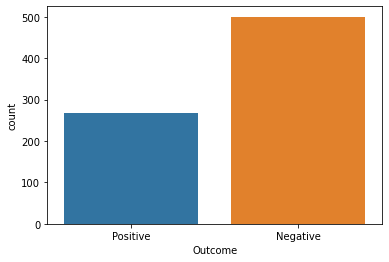

In [9]:
sns.countplot(df['Outcome'])

In [10]:
corr = df.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127402       0.206208       0.024617   
Glucose                      0.127402  1.000000       0.213982       0.168231   
BloodPressure                0.206208  0.213982       1.000000       0.127591   
SkinThickness                0.024617  0.168231       0.127591       1.000000   
Insulin                     -0.050696  0.362338      -0.037024       0.250711   
BMI                          0.021582  0.230458       0.279603       0.542114   
DiabetesPedigreeFunction    -0.033523  0.136601      -0.008042       0.148189   
Age                          0.544341  0.265866       0.318580       0.042886   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.050696  0.021582                 -0.033523   
Glucose                   0.362338  0.230458                  0.136601   
BloodPressure            -0.037024  0.279603                 -0.008042   
SkinThickness             0.250711  0.542114                  0.148189   
Insulin                   1.000000  0.188641                  0.175745   
BMI                       0.188641  1.000000                  0.153288   
DiabetesPedigreeFunction  0.175745  0.153288                  1.000000   
Age                      -0.008048  0.025300                  0.033561   

                               Age  
Pregnancies               0.544341  
Glucose                   0.265866  
BloodPressure             0.318580  
SkinThickness             0.042886  
Insulin                  -0.008048  
BMI                       0.025300  
DiabetesPedigreeFunction  0.033561  
Age                       1.000000

In [11]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

<AxesSubplot:>

In [12]:
#Boxplot with age groups
sns.boxplot(x="Outcome", y="Glucose", hue="Age_Group", data=df, palette="Set3")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

In [13]:
data = df

data.boxplot('Glucose', by='Age_Group', figsize=(12,8))

ctrl = data['Glucose'][data.Age_Group == 'ctrl']

grps = pd.unique(data.Age_Group.values)
d_data = {grp:data['Glucose'][data.Age_Group == grp] for grp in grps}

k = len(pd.unique(data.Age_Group))
N = len(data.values)
n = data.groupby('Age_Group').size()[0]

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

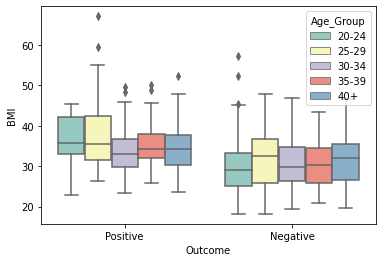

In [14]:
#Boxplot with age groups
sns.boxplot(x="Outcome", y="BMI", hue="Age_Group", data=df, palette="Set3")

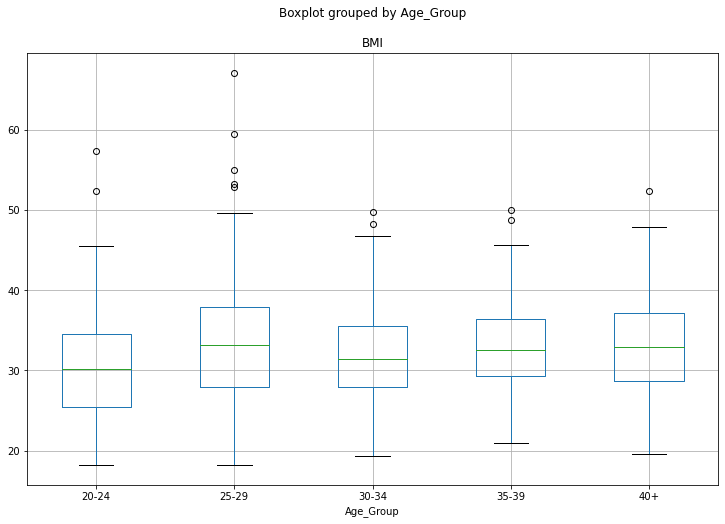

In [15]:
data = df

data.boxplot('BMI', by='Age_Group', figsize=(12,8))

ctrl = data['BMI'][data.Age_Group == 'ctrl']

grps = pd.unique(data.Age_Group.values)
d_data = {grp:data['BMI'][data.Age_Group == grp] for grp in grps}

k = len(pd.unique(data.Age_Group))
N = len(data.values)
n = data.groupby('Age_Group').size()[0]

Text(0.5, 1.0, 'Glucose Q-Q Plot')

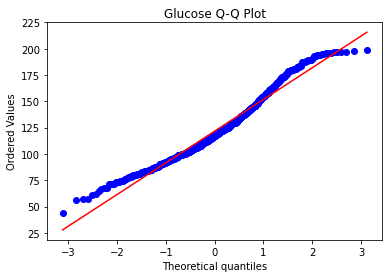

In [16]:
stats.probplot(df['Glucose'], dist="norm", plot= plt)
plt.title("Glucose Q-Q Plot")

Text(0.5, 1.0, 'BMI Q-Q Plot')

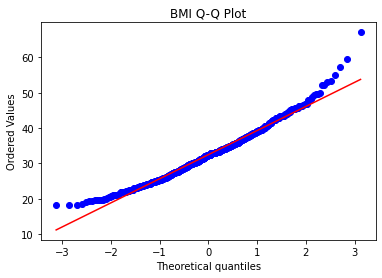

In [17]:
stats.probplot(df['BMI'], dist="norm", plot= plt)
plt.title("BMI Q-Q Plot")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

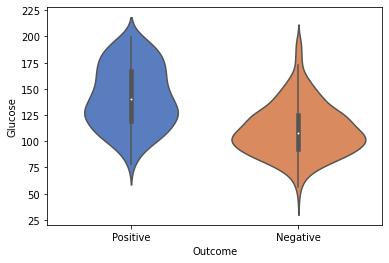

In [18]:
ax = sns.violinplot(x='Outcome', y='Glucose', data=df, palette='muted', split=True)
ax

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

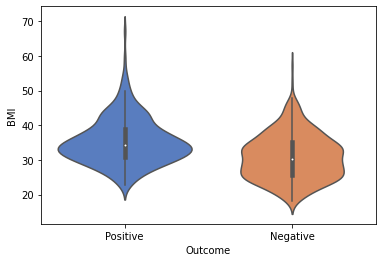

In [19]:
ax = sns.violinplot(x='Outcome', y='BMI', data=df, palette='muted', split=True)
ax

## T-Tests

In [20]:
#Taking a Sample size for the T-test
glucose_samp = df['Glucose'].sample(n=200)
bmi_samp = df['BMI'].sample(n=200)
age_samp = df['Age'].sample(n=200)
outcome_samp = df['Age'].sample(n=200)

In [21]:
tStat, pValue = stats.ttest_ind(glucose_samp, bmi_samp, equal_var=False) #variances will always be unequal, 
#the Welch’s t-test will be conducted by not taking into consideration the equal population variances.
print("P-value: {0} T-statistic: {1}".format(pValue, tStat))

P-value: 4.5532282061836284e-105 T-statistic: 41.2589354321884


In [22]:
tStat, pValue = stats.ttest_ind(bmi_samp, age_samp, equal_var=False) #variances will always be unequal, 
#the Welch’s t-test will be conducted by not taking into consideration the equal population variances.
print("P-value: {0} T-statistic: {1}".format(pValue, tStat))

P-value: 0.8838051750582949 T-statistic: 0.14626105003464054


In [23]:
#Checking homegeneity 
res=stat()
res.levene(df = df, res_var="Glucose", xfac_var = "Age")
res.levene_summary

Parameter    Value
0      Test statistics (W)   1.2013
1  Degrees of freedom (Df)  51.0000
2                  p value   0.1643

In [24]:
res=stat()
res.levene(df = df, res_var="Glucose", xfac_var = "BMI")
res.levene_summary

Parameter     Value
0      Test statistics (W)    0.9542
1  Degrees of freedom (Df)  246.0000
2                  p value    0.6605

## One-way ANOVA

In [26]:
df['BMI_Level'] = pd.cut(df['BMI'], [0,18.5,24.9,29.9,np.inf], labels=['Underweight','Normal','Overweight','Obese'])
df.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35       38  33.6   
1            1       85             66             29       38  26.6   
2            8      183             64             22       38  23.3   

   DiabetesPedigreeFunction  Age   Outcome Age_Group   BMI_Level  
0                     0.627   50  Positive       40+       Obese  
1                     0.351   31  Negative     30-34  Overweight  
2                     0.672   32  Positive     30-34      Normal

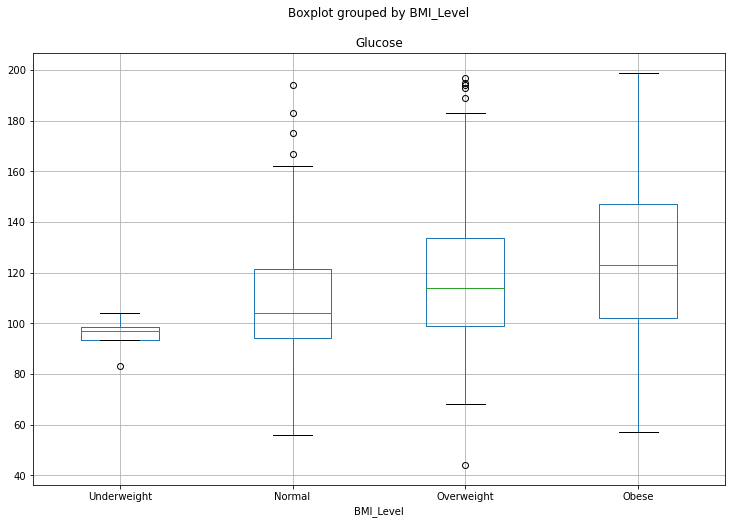

In [27]:
data = df

data.boxplot('Glucose', by='BMI_Level', figsize=(12,8))

ctrl = data['Glucose'][data.Age_Group == 'ctrl']

grps = pd.unique(data.Age_Group.values)
d_data = {grp:data['Glucose'][data.Age_Group == grp] for grp in grps}

k = len(pd.unique(data.Age_Group))
N = len(data.values)
n = data.groupby('BMI_Level').size()[0]

In [28]:
#Glucose Levels and BMI Group ONE WAY ANOVA
model = ols('Glucose ~ BMI_Level', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F        PR(>F)
BMI_Level   32775.735621    3.0  12.311078  7.161117e-08
Residual   677998.076879  764.0        NaN           NaN

In [29]:
#Post Hoc Corrections
pair_t = model.t_test_pairwise('BMI_Level') 
pair_t.result_frame

coef    std err         t         P>|t|  \
Normal-Underweight      13.995098  15.184147  0.921691  3.569805e-01   
Overweight-Underweight  21.817039  15.060403  1.448636  1.478496e-01   
Obese-Underweight       31.070911  14.956448  2.077426  3.809579e-02   
Overweight-Normal        7.821941   3.695678  2.116511  3.462416e-02   
Obese-Normal            17.075813   3.246174  5.260288  1.869460e-07   
Obese-Overweight         9.253872   2.606732  3.549989  4.088200e-04   

                        Conf. Int. Low  Conf. Int. Upp.  pvalue-hs  reject-hs  
Normal-Underweight          -15.812505        43.802701   0.356981      False  
Overweight-Underweight       -7.747644        51.381723   0.273840      False  
Obese-Underweight             1.710298        60.431524   0.131468      False  
Overweight-Normal             0.567052        15.076830   0.131468      False  
Obese-Normal                 10.703333        23.448293   0.000001       True  
Obese-Overweight              4.136663        14.371080   0.002042       True

In [30]:
#Glucose Levels and Age Group one way anova
model = ols('Glucose ~ Age_Group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F        PR(>F)
Age_Group   46098.263602    4.0  13.229378  1.998574e-10
Residual   664675.548898  763.0        NaN           NaN

In [31]:
#Post Hoc Corrections
pair_t = model.t_test_pairwise('Age_Group') 
pair_t.result_frame

coef   std err         t         P>|t|  Conf. Int. Low  \
25-29-20-24   4.690813  2.983194  1.572413  1.162693e-01       -1.165429   
30-34-20-24  11.407038  3.666965  3.110757  1.935558e-03        4.208499   
35-39-20-24  16.059361  3.988876  4.026037  6.238909e-05        8.228886   
40+-20-24    19.050758  2.861147  6.658434  5.291294e-11       13.434103   
30-34-25-29   6.716225  3.793483  1.770464  7.704917e-02       -0.730679   
35-39-25-29  11.368547  4.105486  2.769112  5.757392e-03        3.309159   
40+-25-29    14.359944  3.021596  4.752437  2.401973e-06        8.428316   
35-39-30-34   4.652323  4.626251  1.005636  3.149097e-01       -4.429369   
40+-30-34     7.643720  3.698274  2.066834  3.908657e-02        0.383719   
40+-35-39     2.991397  4.017677  0.744559  4.567677e-01       -4.895616   

             Conf. Int. Upp.     pvalue-hs  reject-hs  
25-29-20-24        10.547056  3.098241e-01      False  
30-34-20-24        18.605577  1.347048e-02       True  
35-39-20-24        23.889835  4.990037e-04       True  
40+-20-24          24.667412  5.291290e-10       True  
30-34-25-29        14.163128  2.743716e-01      False  
35-39-25-29        19.427936  3.405094e-02       True  
40+-25-29          20.291573  2.161755e-05       True  
35-39-30-34        13.734015  5.306513e-01      False  
40+-30-34          14.903720  1.807408e-01      False  
40+-35-39          10.878410  5.306513e-01      False

In [32]:
#BMI and Age Group One way anova
model = ols('BMI ~ Age_Group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df       F    PR(>F)
Age_Group    803.858531    4.0  4.3251  0.001824
Residual   35452.595167  763.0     NaN       NaN

In [33]:
#Post Hoc Corrections
pair_t = model.t_test_pairwise('Age_Group') 
pair_t.result_frame

coef   std err         t     P>|t|  Conf. Int. Low  \
25-29-20-24  2.555576  0.688971  3.709268  0.000223        1.203073   
30-34-20-24  1.512215  0.846888  1.785613  0.074559       -0.150293   
35-39-20-24  2.069406  0.921233  2.246343  0.024967        0.260953   
40+-20-24    2.167408  0.660784  3.280057  0.001085        0.870238   
30-34-25-29 -1.043362  0.876107 -1.190906  0.234061       -2.763229   
35-39-25-29 -0.486170  0.948164 -0.512748  0.608276       -2.347491   
40+-25-29   -0.388168  0.697840 -0.556243  0.578208       -1.758082   
35-39-30-34  0.557192  1.068436  0.521502  0.602168       -1.540231   
40+-30-34    0.655193  0.854119  0.767099  0.443260       -1.021508   
40+-35-39    0.098001  0.927885  0.105618  0.915913       -1.723509   

             Conf. Int. Upp.  pvalue-hs  reject-hs  
25-29-20-24         3.908079   0.002227       True  
30-34-20-24         3.174722   0.418645      False  
35-39-20-24         3.877859   0.183129      False  
40+-20-24           3.464578   0.009722       True  
30-34-25-29         0.676506   0.798086      False  
35-39-25-29         1.375151   0.968349      False  
40+-25-29           0.981745   0.968349      False  
35-39-30-34         2.654614   0.968349      False  
40+-30-34           2.331895   0.946511      False  
40+-35-39           1.919512   0.968349      False

In [34]:
import pingouin as pg

In [35]:
#anova glucose and age group
aov = pg.anova(data=df, dv='Glucose', between='Age_Group', detailed=True)
aov

/Users/betye/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Source             SS   DF            MS          F         p-unc  \
0  Age_Group   46098.263602    4  11524.565901  13.229378  1.998574e-10   
1     Within  664675.548898  763    871.134402        NaN           NaN   

        np2  
0  0.064856  
1       NaN

In [36]:
#pairwise comparisons glucose and age group
pt = pg.pairwise_tukey(dv='Glucose', between='Age_Group', effsize = 'cohen', data=df)
pt

A      B     mean(A)     mean(B)       diff        se         T  \
0  20-24  25-29  112.625571  117.316384  -4.690813  2.983194 -1.572413   
1  20-24  30-34  112.625571  124.032609 -11.407038  3.666965 -3.110757   
2  20-24  35-39  112.625571  128.684932 -16.059361  3.988876 -4.026037   
3  20-24    40+  112.625571  131.676329 -19.050758  2.861147 -6.658434   
4  25-29  30-34  117.316384  124.032609  -6.716225  3.793483 -1.770464   
5  25-29  35-39  117.316384  128.684932 -11.368547  4.105486 -2.769112   
6  25-29    40+  117.316384  131.676329 -14.359944  3.021596 -4.752437   
7  30-34  35-39  124.032609  128.684932  -4.652323  4.626251 -1.005636   
8  30-34    40+  124.032609  131.676329  -7.643720  3.698274 -2.066834   
9  35-39    40+  128.684932  131.676329  -2.991397  4.017677 -0.744559   

    p-tukey     cohen  
0  0.513332 -0.158930  
1  0.016538 -0.386483  
2  0.001000 -0.544109  
3  0.001000 -0.645461  
4  0.393004 -0.227553  
5  0.045466 -0.385179  
6  0.001000 -0.486531  
7  0.834541 -0.157626  
8  0.235703 -0.258978  
9  0.900000 -0.101352

In [37]:
#glucose and bmi
aov = pg.anova(data=df, dv='Glucose', between='BMI_Level', detailed=True)
aov

Source             SS   DF            MS          F         p-unc  \
0  BMI_Level   32775.735621    3  10925.245207  12.311078  7.161117e-08   
1     Within  677998.076879  764    887.432038        NaN           NaN   

        np2  
0  0.046113  
1       NaN

In [38]:
#glucose and bmi
pt = pg.pairwise_tukey(dv='Glucose', between='BMI_Level', effsize = 'cohen', data=df)
pt

A           B     mean(A)     mean(B)       diff         se  \
0  Underweight      Normal   95.250000  109.245098 -13.995098  15.184147   
1  Underweight  Overweight   95.250000  117.067039 -21.817039  15.060403   
2  Underweight       Obese   95.250000  126.320911 -31.070911  14.956448   
3       Normal  Overweight  109.245098  117.067039  -7.821941   3.695678   
4       Normal       Obese  109.245098  126.320911 -17.075813   3.246174   
5   Overweight       Obese  117.067039  126.320911  -9.253872   2.606732   

          T   p-tukey     cohen  
0 -0.921691  0.767949 -0.469795  
1 -1.448636  0.470406 -0.732366  
2 -2.077426  0.161542 -1.043005  
3 -2.116511  0.148747 -0.262571  
4 -5.260288  0.001000 -0.573210  
5 -3.549989  0.002307 -0.310639

## TWO-way ANOVA

In [39]:
#two way anova
res = stat()
res.anova_stat(df=df, res_var='Glucose', anova_model='Glucose ~ C(BMI_Level) + C(Age_Group) + C(BMI_Level):C(Age_Group)')
res.anova_summary

/Users/betye/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


df         sum_sq       mean_sq          F  \
C(BMI_Level)                 3.0   33511.353846  11170.451282  13.269715   
C(Age_Group)                 4.0   10478.813105   2619.703276   3.112024   
C(BMI_Level):C(Age_Group)   12.0   40580.866395   3381.738866   4.017269   
Residual                   751.0  632192.106238    841.800408        NaN   

                                 PR(>F)  
C(BMI_Level)               1.899010e-08  
C(Age_Group)               4.508529e-02  
C(BMI_Level):C(Age_Group)  4.602256e-06  
Residual                            NaN

In [40]:
#tukeyhsd as post hoc correction
res=stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var='BMI_Level',anova_model='Glucose ~ C(BMI_Level) + C(Age_Group) + C(BMI_Level):C(Age_Group)')
res.tukey_summary

/Users/betye/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


group1       group2       Diff      Lower      Upper   q-value  \
0       Obese   Overweight   9.253872   2.716825  15.790919  5.154719   
1       Obese       Normal  17.075813   8.935202  25.216424  7.638139   
2       Obese  Underweight  31.070911  -6.436201  68.578023  3.016501   
3  Overweight       Normal   7.821941  -1.445915  17.089797  3.073254   
4  Overweight  Underweight  21.817039 -15.950765  59.584843  2.103474   
5      Normal  Underweight  13.995098 -24.083027  52.073223  1.338331   

    p-value  
0  0.001625  
1  0.001000  
2  0.143576  
3  0.131546  
4  0.447045  
5  0.754127

In [41]:
#tukeyhsd as post hoc correction
res=stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var='Age_Group',anova_model='Glucose ~ C(BMI_Level) + C(Age_Group) + C(BMI_Level):C(Age_Group)')
res.tukey_summary

/Users/betye/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


group1 group2       Diff      Lower      Upper   q-value   p-value
0    40+  30-34   7.643720  -2.297201  17.584640  2.973437  0.220034
1    40+  20-24  19.050758  11.360026  26.741489  9.579109  0.001000
2    40+  25-29  14.359944   6.237927  22.481961  6.837060  0.001000
3    40+  35-39   2.991397  -7.808075  13.790869  1.071154  0.900000
4  30-34  20-24  11.407038   1.550275  21.263801  4.475268  0.013950
5  30-34  25-29   6.716225  -3.480617  16.913066  2.547065  0.374619
6  30-34  35-39   4.652323  -7.782990  17.087636  1.446751  0.824698
7  20-24  25-29   4.690813  -3.327979  12.709606  2.262141  0.497813
8  20-24  35-39  16.059361   5.337306  26.781416  5.792029  0.001000
9  25-29  35-39  11.368547   0.333047  22.404048  3.983763  0.039801

## Multiple Linear Regression

In [42]:
X = df[['BMI','Age']]
y = df['Glucose']


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff

Coefficient
BMI     1.085145
Age     0.713145

In [46]:
print(regressor.intercept_)

62.364354853004784


In [47]:
print(regressor.coef_)

[1.08514511 0.7131449 ]


In [48]:
#making predictions
y_pred = regressor.predict(X_test)

In [49]:
r2 = regressor.score(X, y)

In [50]:
multi_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
multi_df

Actual   Predicted
661     199  124.606268
122     107  115.227563
113      76  117.087911
14      166  126.731489
529     111  111.166417
..      ...         ...
476     105  119.614947
482      85  112.499446
230     142  125.799928
527     116  108.019149
380     107  112.902302

[154 rows x 2 columns]

In [53]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', r2)


Mean Absolute Error: 23.82537633859199
Mean Squared Error: 939.6625511616359
Root Mean Squared Error: 30.6539157557666
R-Squared: 0.11986626480034468


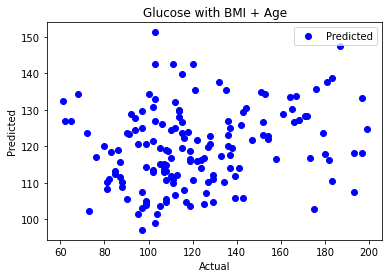

In [54]:
#check the plot
multi_df.plot(x='Actual', y='Predicted', style='bo')
plt.title('Glucose with BMI + Age')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()